<a href="https://colab.research.google.com/github/VamBay/DS4BME_YUANWEI_XU/blob/master/CMM_final_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing, model_selection, neighbors

In [2]:
#===========================================
# Read data.  Change DATAPATH if necessary
#===========================================
try:
    # Executes if running in Google Colab
    from google.colab import drive
    drive.mount('gdrive/')
    DATAPATH = "gdrive/My Drive/DS4BME/CMM" # Change path to location of data if necessary
except:
    # Executes if running locally (e.g. Anaconda)
    DATAPATH = "./"

# Read data
dat = pd.read_csv('/'.join((DATAPATH,'fold1.8_10DEGs.csv')))
X = np.array(dat.drop(['response', 'ID'], 1))# Rows are patients, columns are gene expression leveles of the 5 DEGs identified
y = np.array(dat['response']) # Response RD=1 and pCR=0

Mounted at gdrive/


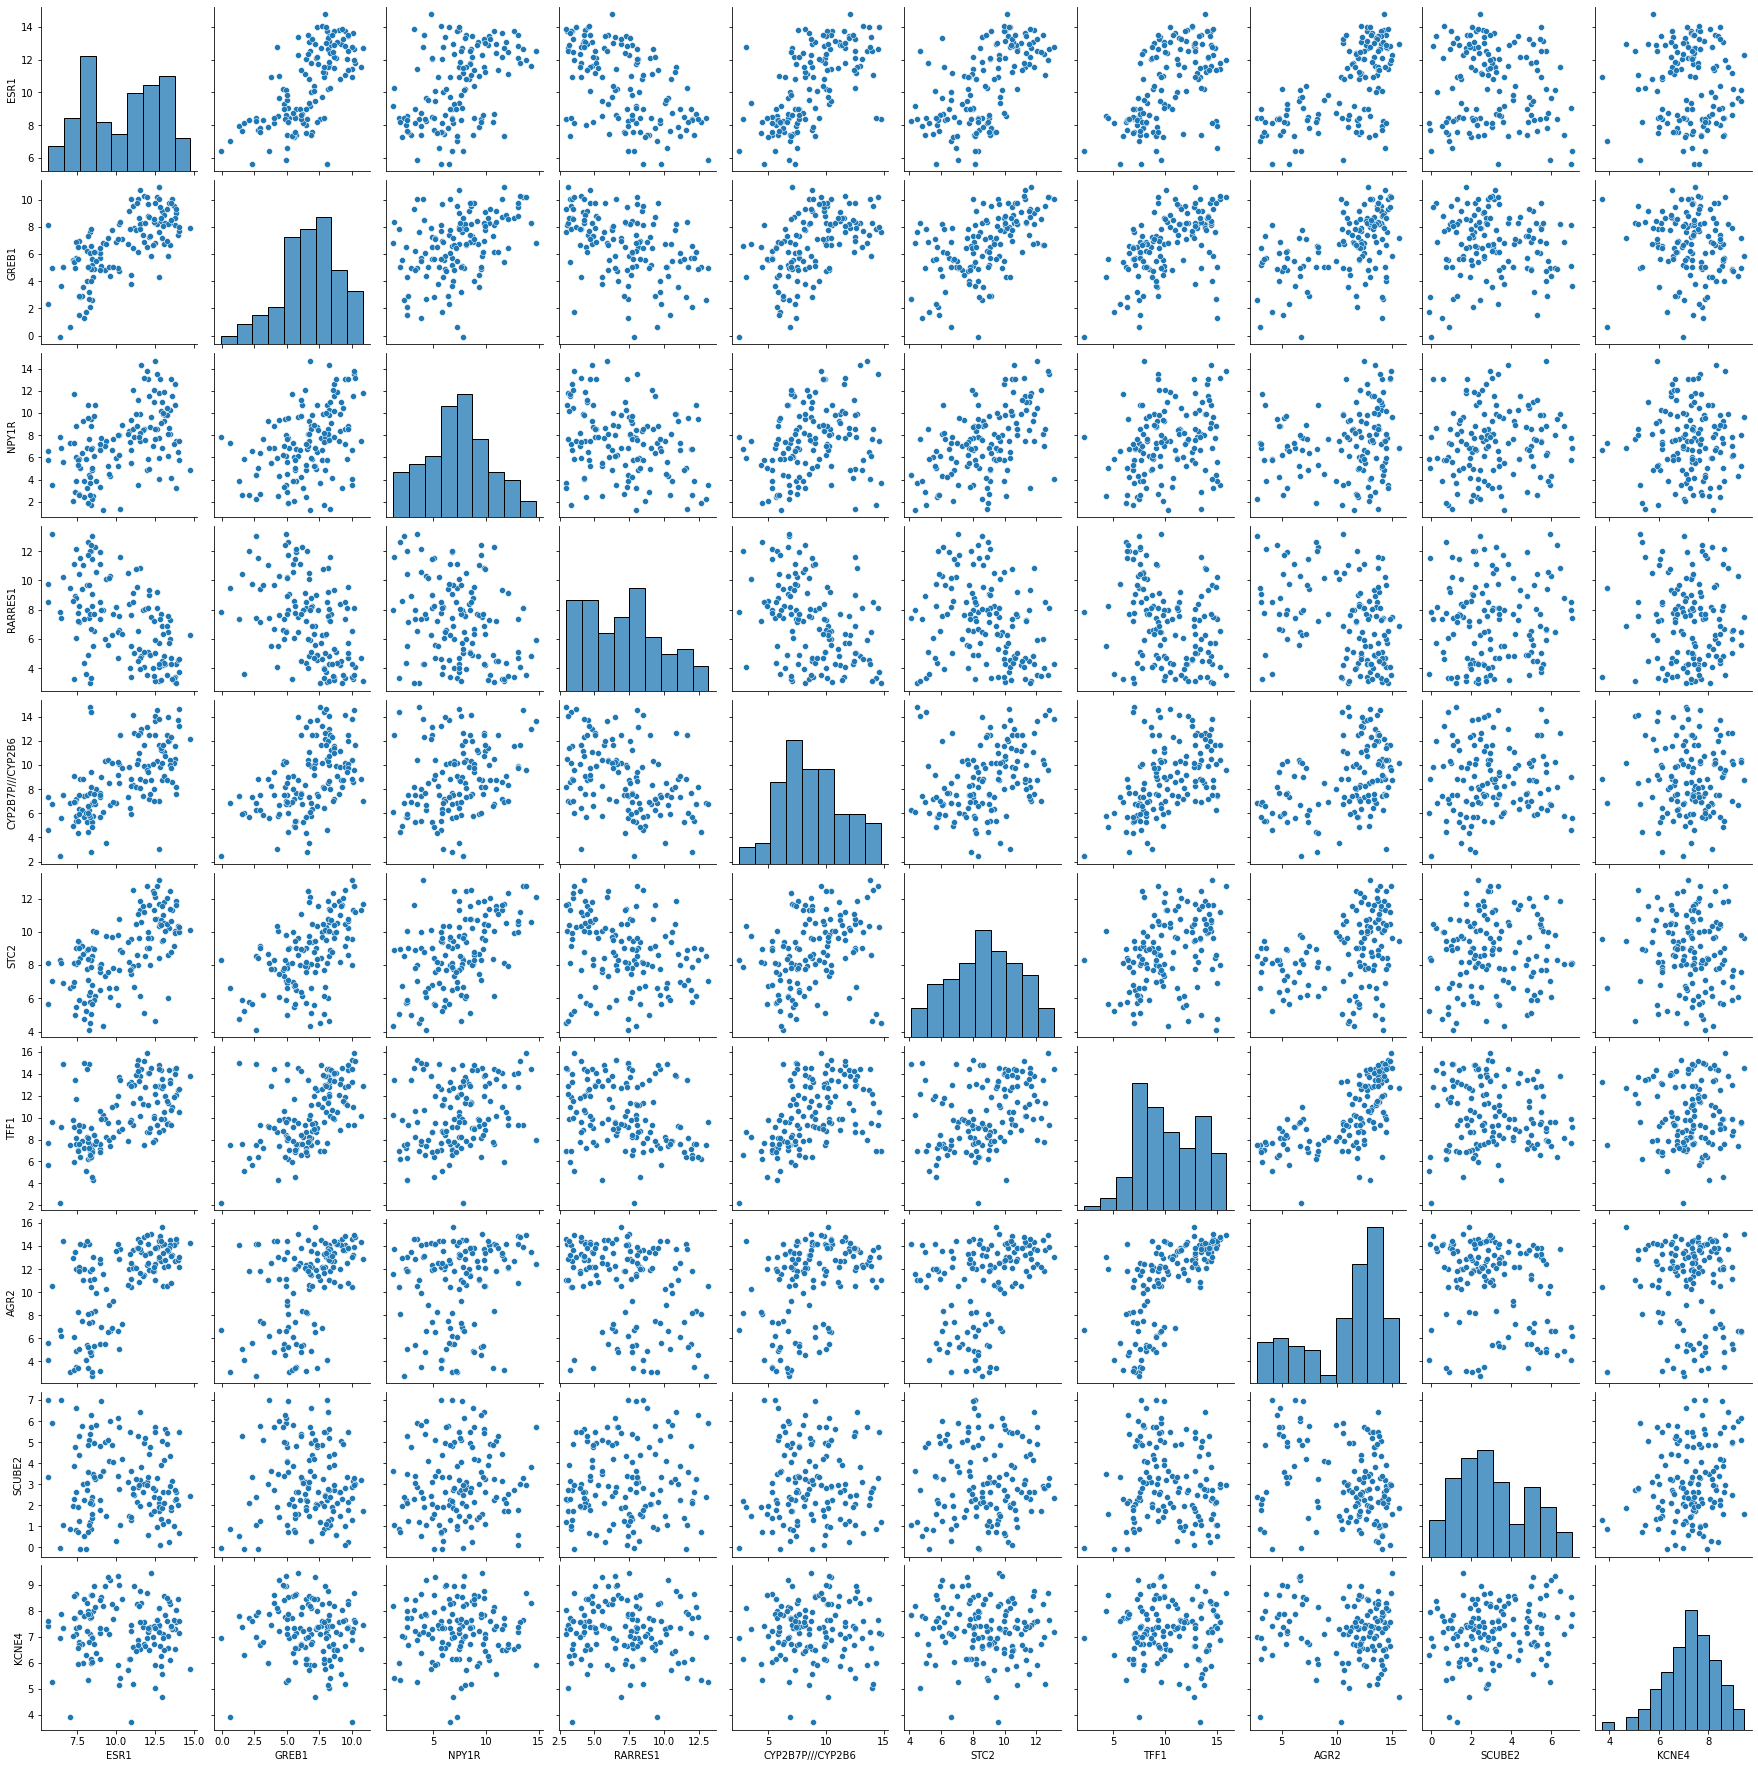

In [3]:
#
sns.pairplot(dat, vars = ['ESR1', 'GREB1','NPY1R', 'RARRES1', 'CYP2B7P///CYP2B6', 'STC2', 'TFF1', 'AGR2', 'SCUBE2', 'KCNE4'])

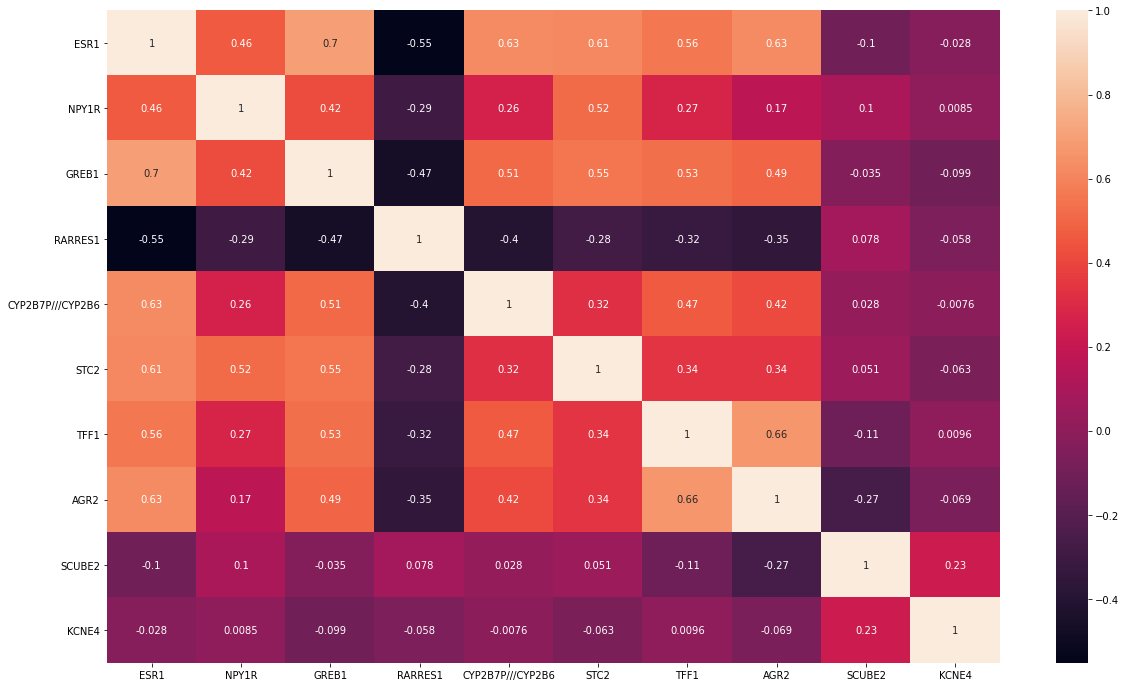

In [3]:
#check the correlations between the DEGs identified
plt.figure(figsize=(20,12))
sns.heatmap(dat.drop(['response', 'ID'], 1).corr(), annot=True)

In [18]:
dat_DEGs = dat.drop(['response', 'ID'], 1)
DEGs_corr = dat_DEGs.corr()
columns = np.full((DEGs_corr.shape[0],), True, dtype=bool)
for i in range(DEGs_corr.shape[0]):
    for j in range(i+1, DEGs_corr.shape[0]):
        if DEGs_corr.iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False
selected_columns = dat_DEGs.columns[columns]
dat_1 = dat_DEGs[selected_columns]
dat_1

,ESR1,NPY1R,RARRES1,SCUBE2,KCNE4
0,13.7616,10.7598,3.0224,2.2450,7.2848
1,12.7360,7.7832,5.6946,2.1254,7.4132
2,13.8228,7.4413,4.3076,2.6116,7.5750
3,8.3607,3.6891,2.9711,1.2172,7.0916
4,8.9998,6.7869,11.9411,4.8064,7.1453
...,...,...,...,...,...
134,12.4514,12.1140,3.4511,1.7288,6.7350
135,12.5366,8.5422,5.0627,5.4751,7.3198
136,11.4629,7.8008,5.2891,2.9470,8.1861
137,12.0708,5.8334,8.0912,3.3660,7.3542


In [24]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [25]:
# Defining KNN Classifier
KNNclf = neighbors.KNeighborsClassifier()
KNNclf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
# Evaluating the KNN Classifer
accuracy = KNNclf.score(X_test, y_test)
print(f"Accuracy: {accuracy}\n")

Accuracy: 0.8214285714285714



[[14 11]
 [ 4 82]]
              precision    recall  f1-score   support

           0       0.78      0.56      0.65        25
           1       0.88      0.95      0.92        86

    accuracy                           0.86       111
   macro avg       0.83      0.76      0.78       111
weighted avg       0.86      0.86      0.86       111



Text(0.5, 1.0, 'ROC Curve for training data with AUC: 0.9227906976744186')

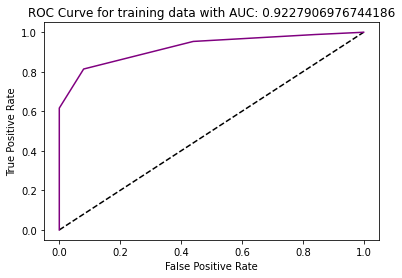

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Predict the labels of the training set: y_pred
ypred_knn = KNNclf.predict(X_train)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_train, ypred_knn))
print(classification_report(y_train, ypred_knn))
# Compute predicted probabilities: ypred_prob
ypred_knn_prob = KNNclf.predict_proba(X_train)[:, 1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, ypred_knn_prob)

# Plot ROC curve for testing data
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color = 'purple')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training data with AUC: {}'.format(auc(fpr,tpr)))

In [12]:
from sklearn.svm import SVC
# Defining SVM Classifier
SVMclf = SVC()
SVMclf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
# Evaluating the SVM Classifer
accuracy = SVMclf.score(X_test, y_test)
print(f"Accuracy: {accuracy}\n")

Accuracy: 0.8214285714285714



[[ 2 21]
 [ 0 88]]
              precision    recall  f1-score   support

           0       1.00      0.09      0.16        23
           1       0.81      1.00      0.89        88

    accuracy                           0.81       111
   macro avg       0.90      0.54      0.53       111
weighted avg       0.85      0.81      0.74       111



Text(0.5, 1.0, 'ROC Curve for training data with AUC: 0.8799407114624507')

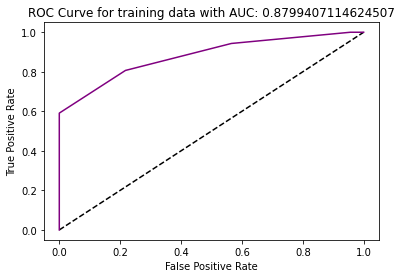

In [14]:
# Predict the labels of the training set: y_pred
ypred_svm = SVMclf.predict(X_train)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_train, ypred_svm))
print(classification_report(y_train, ypred_svm))
# Compute predicted probabilities: ypred_prob
ypred_svm_prob = KNNclf.predict_proba(X_train)[:, 1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, ypred_svm_prob)

# Plot ROC curve for testing data
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color = 'purple')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training data with AUC: {}'.format(auc(fpr,tpr)))